420-A52-SF - Algorithmes d'apprentissage supervisé - Automne 2022 - Spécialisation technique en Intelligence Artificielle<br/>
MIT License - Copyright (c) 2022 Mikaël Swawola
<br/>
![Travaux Pratiques - Optimisation des hyperparamètres 101](static/16-tp-banner.png)
<br/>
**Objectif:** cette séance de travaux pratiques a pour objectif la recherche des meilleurs hyperparamètres appliqués à l'ensemble des algorithmes vus en cours jusqu'à maintenant. Le jeu de données utilisée sera **Titanic**

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

## Exercice 1 - Chargement et exploration sommaire des données

In [23]:
import pandas as pd
#titanic = pd.read_csv('../../data/titanic_train.csv', index_col='PassengerId')
titanic = pd.read_csv('../../data/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
import seaborn as sns

# Configuration de la visualisation
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5, })
sns.set(rc={'figure.figsize':(11.7,8.27)})

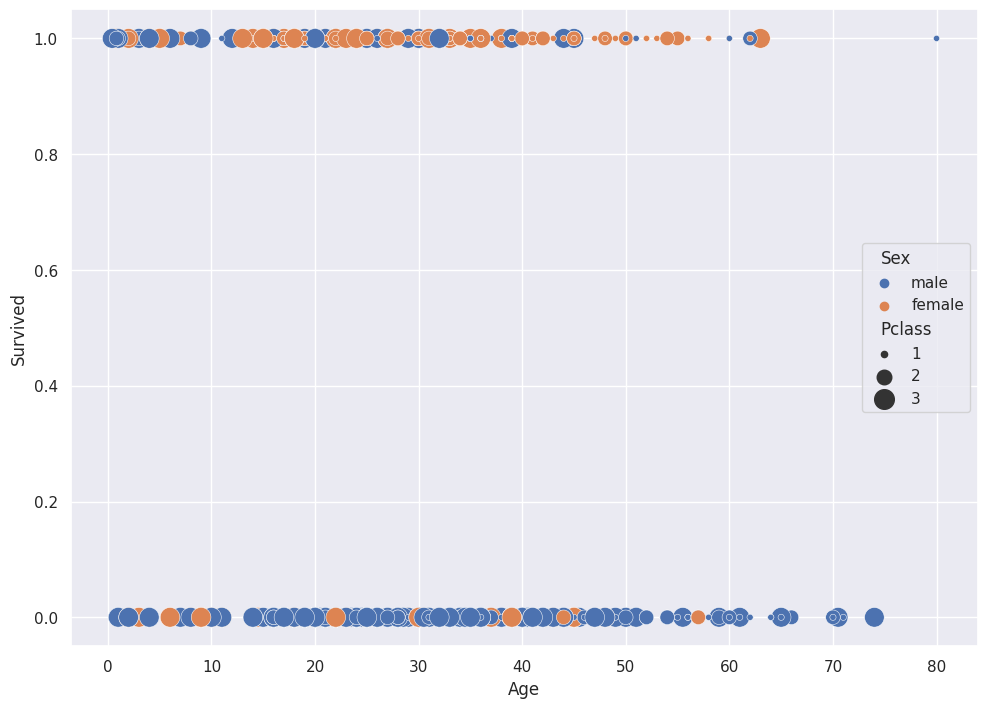

In [25]:
_ = sns.scatterplot(x='Age', y='Survived', hue='Sex', size='Pclass', sizes=(20, 200), data=titanic)

In [26]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Conversion des variables `embarked` et `sex`

In [6]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [34]:
lstColxExcl = ['PassengerId',  'Name', 'Cabin', 'Ticket']
dfTitanicNum = titanic.drop(lstColxExcl, axis =1)
dfTitanicNum = dfTitanicNum.fillna(dfTitanicNum['Age'].mean())
col_sex_num = pd.get_dummies(titanic['Sex'], drop_first=True, columns=['Sex'])
#print(col_sex_num.head())
dfTitanicNum = pd.get_dummies(dfTitanicNum, drop_first=True)

dfTitanicNum.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [35]:
dfTitanicNum.isnull().sum()
#dfTitanicNum.head()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

#### Vérification de la proportion des classes positives (Survided) et négatives (Died) 

In [36]:
dfTitanicNum.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [39]:
dfXNum = dfTitanicNum.drop(columns=['Survived'])
dfYNum = dfTitanicNum['Survived']

In [40]:
dfXNum.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


#### Imputation des valeurs manquantes

Les valeurs manquantes seront imputées pour l'exercice pour simplififer

#### Préparation du jeu de test

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
def getScaledDf(pDfX, pScaler = StandardScaler()):
    return pScaler.fit_transform(pDfX)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(getScaledDf( dfXNum), dfYNum, train_size=0.7
, random_state=2023
, shuffle=True
, stratify = dfYNum)

## Exercice 2 - Recherche sur grille

### 2-1 - Régression logistique

[class sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [84]:
#model = LogisticRegression(penalty='l2', C=1.0, l1_ratio=[0, 0.5, 1.0], solver='saga')
#model = LogisticRegression(penalty='elasticnet', C=1.0, l1_ratio=[0, 0.5, 1.0], solver='saga')
model = LogisticRegression( solver='saga')

In [85]:
param_grid = {'C' :[0, 0.01, 0.1, 0.4,  0.5, 0.55,  0.6, 1]
, 'l1_ratio': [0, 0.5, 1]
, 'penalty': ['l1', 'l2', 'elasticnet', 'none']
#, 'penalty': ['l1', 'l2', 'elasticnet']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_train, y_train)

print("Best params: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/hado

Best params:  {'C': 0.55, 'l1_ratio': 0, 'penalty': 'l1'}
Best score:  0.8610722738907229


/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages

In [ ]:
## 1 définir une grille "C", "L1_ratio" dict paython
## 2 LogisticRegression(penalty) 
## 3 GridSearchCV 5 plis AUC
## 4 fit

#### Vérification du meilleur score

In [62]:
## 5  best_estimator, best_params
## 6 score cross_val
model = LogisticRegression(penalty='l2', C=0.5, l1_ratio=[0, 0.5, 1.0])
model.fit(X_train, y_train)


/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


LogisticRegression(C=0.5, l1_ratio=[0, 0.5, 1.0])

#### Aire sous la courbe

In [86]:
y_train_pred_proba = grid_search.predict_proba(X_train)[:, 1]
print('AUC = ',  roc_auc_score(y_train, y_train_pred_proba))

AUC =  0.8664465655509065


#### Courbe ROC

### 2-2 - K plus proches voisins

[class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
model_knn = KNeighborsClassifier(n_neighbors = 5, weights ='uniform', algorithm = 'auto'
, leaf_size=30, p=2)

In [71]:
param_grid = {'n_neighbors': [2,3,5,10,20], 'leaf_size':[10, 20, 30], 'p':[1,2,3]
, 'metric': ['minkowski', 'euclidean', 'manhattan']  }
grid_search = GridSearchCV(model_knn, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best parameters: ", grid_search.best_score_)

Best parameters:  {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 20, 'p': 1}
Best parameters:  0.8693047824469297


#### Aire sous la courbe

#### Courbe ROC

## Exercice 3 - Recherche aléatoire

### 3-1 - Arbres de décision

[class sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

#### Aire sous la courbe

#### Courbe ROC

### 3-2 - Bagging

[class sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

#### Aire sous la courbe

#### Courbe ROC

## Exercice 4 - Hyperopt avec Forêts aléatoires et gradient boosting

### 4-1 - Gradient boosting

#### Définition de l'hyperespace

#### Fonction objective

#### Lancement de l'optimisation

#### Meilleurs paramètres

#### Réentraînement du gradient boosting avec les meilleurs hyperparamètres

#### Aire sous la courbe

#### Courbe ROC

### 4-2 - Gradient boosting et forêts aléatoires (optionnel)

## Exercice 5 - Performances sur le jeu de tests

#### Aire sous la courbe

#### Courbe ROC